# Статистика 3

In [9]:
# Импортируем нужные библиотеки
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(rc={'figure.figsize':(20,8)}, style = 'whitegrid')

Задание 1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.

In [5]:
df = pd.read_csv('/home/jupyter-a-berezin-18/Statistics/Datasets/london.csv', parse_dates = ['timestamp'])

In [6]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [7]:
df.shape

(17414, 10)

## Описание данных  

**timestamp** – дата и время (точность до часа)  
**cnt** – количество аренд велосипедов за этот час  
**t1** – температура, в С  
**t2** – температура "ощущается как", в С  
**hum** – влажность (%)  
**wind_speed** – скорость ветра, км/ч  
**weather_code** – погодные условия:  
 - 1 – ясно (SKC)  
 - 2 – преимущественно ясно / встречаются отдельные облака (SCT)  
 - 3 – облачно / значительные облака (BKN)  
 - 4 – пасмурно (OVC)  
 - 7 – небольшой дождь Rain/ light Rain shower/ Light rain  
 - 10 – дождь с грозой  
 - 26 – снегопад  
 - 94 – ледяной туман  
 
**isholiday** – является ли день праздником (1 – праздник, 0 – нет)  
**isweekend** –  является ли день выходным (1 – выходной, 0 – нет)  
**season** – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)  

In [8]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [11]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

Задание 2. Постройте график по числу поездок по дате и времени.

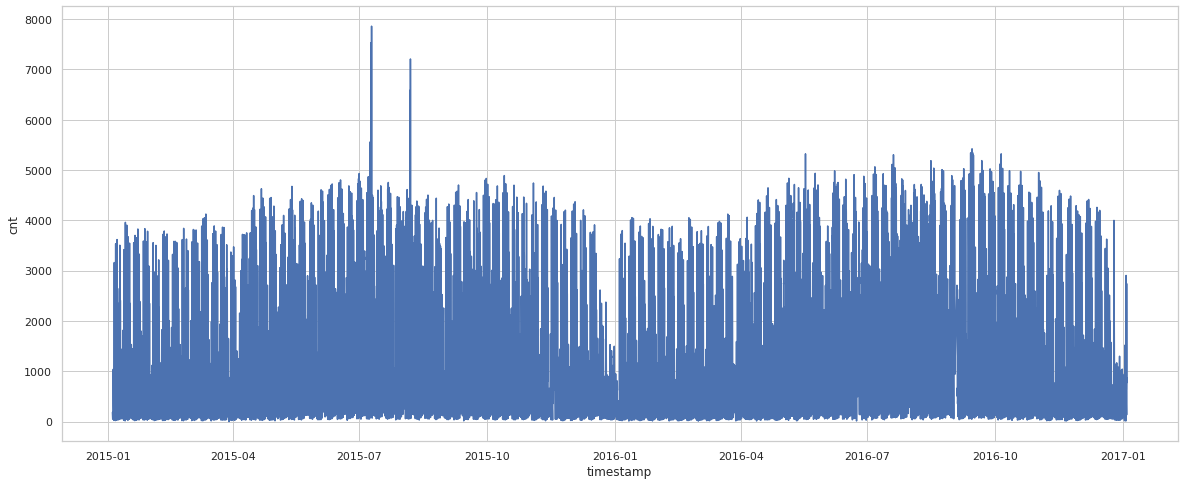

In [10]:
sns.lineplot(data = df, x = 'timestamp', y = 'cnt')

График сложен для восприятия, необходимо преобразовать данные

Задание 3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.

In [12]:
df.sort_values(by = 'timestamp', inplace = True)
df.set_index('timestamp', drop = False, inplace = True)

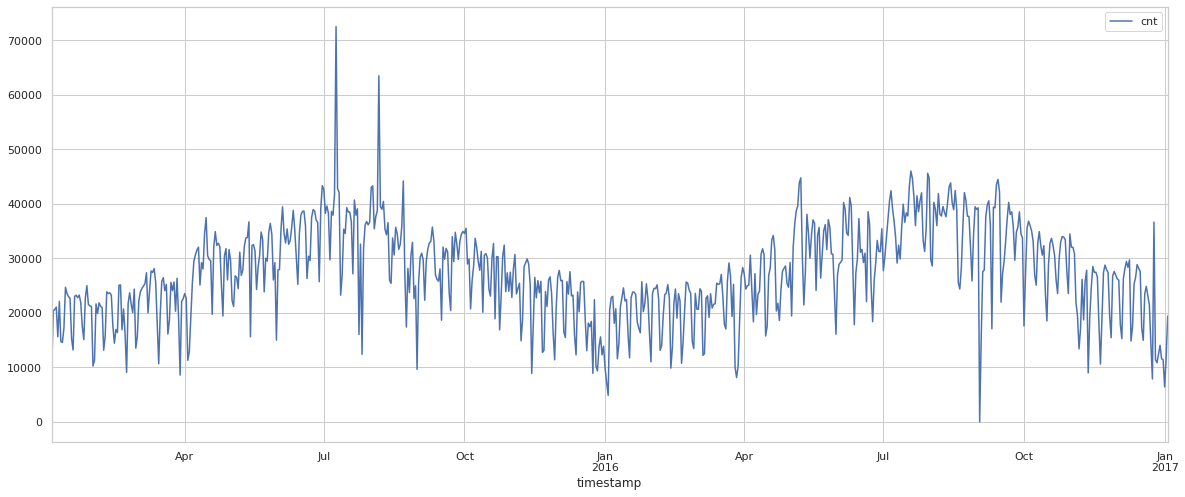

In [13]:
df.resample(rule='D').agg({'cnt': 'sum'}).plot()

Выводы из графика:  
 - Максимальное число аренд за день составляет более 70 000  
 - Встречаются как очень резкие скачки числа аренд, так и падения
 - Зимой число аренд меньше, чем летом

Задание 4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.  

Для этого разделим дальнейшие действия на несколько этапов:

 - сначала посчитаем скользящее среднее, чтобы сгладить ряд  
 - далее – разницу между наблюдаемыми и сглаженными значениями  
 - определим верхние и нижние границы 99% доверительного интервала   
 - найдем причины аномалий  

In [15]:
df_by_day = df.resample("D").cnt.sum().reset_index()
df_by_day.head(3)

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613


In [17]:
df_by_day_roll = df.resample("D").cnt.sum().rolling(window = 3).mean().reset_index()
df_by_day_roll

,timestamp,cnt
0,2015-01-04,NaN
1,2015-01-05,NaN
2,2015-01-06,16739.666667
3,2015-01-07,20683.000000
4,2015-01-08,19092.666667
...,...,...
726,2016-12-30,12682.000000
727,2016-12-31,12347.333333
728,2017-01-01,9803.666667
729,2017-01-02,9889.333333


In [18]:
df_by_day_roll.query('timestamp == "2015-07-09"')

,timestamp,cnt
186,2015-07-09,50705.0


Задание 5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.

In [19]:
round((np.std(df_by_day['cnt'] - df_by_day_roll['cnt'])),2)

4558.59

In [21]:
std = np.std(df_by_day['cnt'] - df_by_day_roll['cnt'])

Задание 6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.  
Теперь определим границы интервалов. Для этого нужно взять данные, полученные при расчете скользящего среднего, и создать следующие объекты:

 - upper_bound – верхняя граница; к средним прибавляем 2.576∗std  
 - lower_bound – нижняя граница; вычитаем 2.576∗std 
 
Полученные значения запишите в новые столбцы датафрейма с агрегированными данными.  

Чему равно значение верхней границы для последнего наблюдения? Ответ укажите с точностью до 2 знаков после точки.

In [24]:
upper_bound = df_by_day_roll.cnt + (2.576 * std)
lower_bound = df_by_day_roll.cnt - (2.576 * std)

In [25]:
round(upper_bound.iloc[730],2)

24302.92

In [26]:
df_by_day['upper_bound'] = upper_bound
df_by_day['lower_bound'] = lower_bound

In [27]:
df_by_day

,timestamp,cnt,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN
1,2015-01-05,20372,NaN,NaN
2,2015-01-06,20613,28482.585854,4996.747479
3,2015-01-07,21064,32425.919188,8940.080812
4,2015-01-08,15601,30835.585854,7349.747479
...,...,...,...,...
726,2016-12-30,11566,24424.919188,939.080812
727,2016-12-31,11424,24090.252521,604.414146
728,2017-01-01,6421,21546.585854,-1939.252521
729,2017-01-02,11823,21632.252521,-1853.585854


Задание 7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
Сначала выведите наблюдения, для которых наблюдаемые значения оказались больше верхней границы 99% доверительного интервала.

В какой день значение числа аренд оказалось наибольшим? Укажите дату в формате 2020-12-31.

In [28]:
df_by_day[df_by_day.cnt > df_by_day.upper_bound]

,timestamp,cnt,upper_bound,lower_bound
186,2015-07-09,72504,62447.919188,38962.080812
214,2015-08-06,63468,58370.252521,34884.414146
609,2016-09-04,27512,26001.919188,2516.080812
721,2016-12-25,36653,31393.585854,7907.747479


Ответ - 2015-07-09 аномалия в этот день связана с забастовками в метро (по данным Google)